# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

In [210]:
# 필요 라이브러리부터 설치할께요.
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as spst

from sklearn.metrics import *
from sklearn.preprocessing import *

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

---

# (실습준비) 데이터 불러오기부터

In [211]:
import pandas as pd

# # 학습 데이터 로딩
# air_21 = pd.read_csv("air_2021.csv", sep=',', index_col = 0, encoding = 'utf-8' )
# air_22 = pd.read_csv("air_2022.csv", sep=',', index_col = 0, encoding = 'utf-8' )
# weather_21 = pd.read_csv("weather_2021.csv", sep = ',', encoding='cp949')
# weather_22 = pd.read_csv("weather_2022.csv", sep = ',', encoding='cp949')

data_21 = pd.read_csv('data_21.csv')
data_22 = pd.read_csv('data_22.csv')

drop_data_21 = pd.read_csv('drop_data_21.csv')
drop_data_22 = pd.read_csv('drop_data_22.csv')

In [212]:
flag_col = ['기온 QC플래그', '풍속 QC플래그', '풍향 QC플래그', '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', '지면온도 QC플래그', '일조 QC플래그', '일사 QC플래그']
wt_class_col = ['전운량(10분위)', '중하층운량(10분위)', '풍향(16방위)', '월', '시간', '년']
wt_num_col = ['기온(°C)', '풍속(m/s)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)','시정(10m)', '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

In [213]:
nan_col = ['지면상태(지면상태코드)', '운형(운형약어)', '최저운고(100m )', '현상번호(국내식)',  '강수량 QC플래그']
nan_num = ['강수량(mm)', '적설(cm)', '3시간신적설(cm)']
drop_col = nan_col + nan_num

---

# 1. 이상치/결측치 처리

#### [실습문제] 데이터 결측치 처리
* 날씨 데이터의 결측치를 확인하고 결측치가 존재한다면 처리해주세요.

* '강우량'을 어떻게 해야할까요?

### IterativeImputer

In [214]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [215]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data_21.isna().sum()

SO2               112
CO                 80
O3                 97
NO2                80
PM10              105
PM25               97
기온(°C)              1
기온 QC플래그            1
강수량(mm)          7811
강수량 QC플래그        6997
풍속(m/s)             3
풍속 QC플래그            1
풍향(16방위)            3
풍향 QC플래그            1
습도(%)               1
습도 QC플래그            1
증기압(hPa)            1
이슬점온도(°C)           1
현지기압(hPa)           1
현지기압 QC플래그          1
해면기압(hPa)           1
해면기압 QC플래그          1
일조(hr)           3969
일조 QC플래그            1
일사(MJ/m2)        3969
일사 QC플래그            1
적설(cm)           8381
3시간신적설(cm)       8731
전운량(10분위)           3
중하층운량(10분위)         1
운형(운형약어)         3813
최저운고(100m )      4213
시정(10m)             1
지면상태(지면상태코드)     8760
현상번호(국내식)        6635
지면온도(°C)            6
지면온도 QC플래그          1
5cm 지중온도(°C)        6
10cm 지중온도(°C)       6
20cm 지중온도(°C)       6
30cm 지중온도(°C)       6
월                   1
시간                  1
년                   1
dtype: int64

In [216]:
drop_data_21.isna().sum()

SO2               112
CO                 80
O3                 97
NO2                80
PM10              105
PM25               97
기온(°C)              1
기온 QC플래그            1
풍속(m/s)             3
풍속 QC플래그            1
풍향(16방위)            3
풍향 QC플래그            1
습도(%)               1
습도 QC플래그            1
증기압(hPa)            1
이슬점온도(°C)           1
현지기압(hPa)           1
현지기압 QC플래그          1
해면기압(hPa)           1
해면기압 QC플래그          1
일조(hr)           3969
일조 QC플래그            1
일사(MJ/m2)        3969
일사 QC플래그            1
전운량(10분위)           3
중하층운량(10분위)         1
시정(10m)             1
지면온도(°C)            6
지면온도 QC플래그          1
5cm 지중온도(°C)        6
10cm 지중온도(°C)       6
20cm 지중온도(°C)       6
30cm 지중온도(°C)       6
월                   1
시간                  1
년                   1
dtype: int64

In [217]:
class_col_drop = flag_col + wt_class_col
num_col_drop = ['SO2', 'CO', 'O3', 'NO2', 'PM10','PM25'] + wt_num_col

In [218]:
class_col_total = flag_col + wt_class_col + nan_col
num_col_total = ['SO2', 'CO', 'O3', 'NO2', 'PM10','PM25'] + wt_num_col + nan_num

In [219]:
for c in list(drop_data_21[flag_col]):
    print(c, drop_data_21[c].unique())

기온 QC플래그 [ 0. nan]
풍속 QC플래그 [ 0.  9. nan]
풍향 QC플래그 [ 0.  9. nan]
습도 QC플래그 [ 0. nan]
현지기압 QC플래그 [ 0. nan]
해면기압 QC플래그 [ 0. nan]
지면온도 QC플래그 [ 0.  9. nan]
일조 QC플래그 [ 9.  0. nan]
일사 QC플래그 [ 9.  0. nan]


In [220]:
iter_data_21 = drop_data_21.copy()
iter_data_22 = drop_data_22.copy()

In [221]:
iter_im = IterativeImputer(max_iter = 10, random_state = 0)
iter_data_21[num_col_drop] = iter_im.fit_transform(drop_data_21[num_col_drop])


In [222]:
iter_data_22[num_col_drop] = iter_im.fit_transform(drop_data_22[num_col_drop])

In [224]:
iter_data_21.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         1
풍속(m/s)          0
풍속 QC플래그         1
풍향(16방위)         3
풍향 QC플래그         1
습도(%)            0
습도 QC플래그         1
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       1
해면기압(hPa)        0
해면기압 QC플래그       1
일조(hr)           0
일조 QC플래그         1
일사(MJ/m2)        0
일사 QC플래그         1
전운량(10분위)        3
중하층운량(10분위)      1
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       1
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
월                1
시간               1
년                1
dtype: int64

In [223]:

iter_data_22.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
월                0
시간               0
년                0
dtype: int64

In [225]:
iter_data_21['y'] = iter_data_21['PM10'].shift(-1)
iter_data_21.drop(index=iter_data_21.tail(1).index, inplace=True)


In [226]:
iter_data_22['y'] = iter_data_22['PM10'].shift(-1)
iter_data_22.drop(index=iter_data_22.tail(1).index, inplace=True)

In [227]:
iter_data_22.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
월                0
시간               0
년                0
y                0
dtype: int64

In [228]:
iter_data_21['풍향(16방위)'] = iter_data_21['풍향(16방위)'].fillna(method='ffill')
iter_data_21['전운량(10분위)'] = iter_data_21['전운량(10분위)'].fillna(method='ffill')

In [229]:
iter_data_21.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
월                0
시간               0
년                0
y                0
dtype: int64

In [230]:
iter_data_21['현상번호(국내식)'] = data_21['현상번호(국내식)']
iter_data_21['현상번호(국내식)'] .dtype

dtype('float64')

In [231]:
iter_data_22['현상번호(국내식)'] = data_22['현상번호(국내식)']
iter_data_22['현상번호(국내식)'].dtype

dtype('float64')

In [232]:
iter_data_21['먼지현상'] = 0
iter_data_21.loc[iter_data_21['현상번호(국내식)'].isin([40,42]), '먼지현상'] = 1

In [233]:
iter_data_22['먼지현상'] = 0
iter_data_22.loc[iter_data_22['현상번호(국내식)'].isin([40,42]), '먼지현상'] = 1

In [234]:
iter_data_21 = iter_data_21.drop(columns='현상번호(국내식)', axis=0)

In [235]:
iter_data_22 = iter_data_22.drop(columns='현상번호(국내식)', axis=0)

In [236]:
iter_data_21.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
월                0
시간               0
년                0
y                0
먼지현상             0
dtype: int64

In [237]:
list(iter_data_21)
iter_data_21 = iter_data_21[['월',
 '시간',
 '년','SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 'PM25',
 '기온(°C)',
 '기온 QC플래그',
 '풍속(m/s)',
 '풍속 QC플래그',
 '풍향(16방위)',
 '풍향 QC플래그',
 '습도(%)',
 '습도 QC플래그',
 '증기압(hPa)',
 '이슬점온도(°C)',
 '현지기압(hPa)',
 '현지기압 QC플래그',
 '해면기압(hPa)',
 '해면기압 QC플래그',
 '일조(hr)',
 '일조 QC플래그',
 '일사(MJ/m2)',
 '일사 QC플래그',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '시정(10m)',
 '지면온도(°C)',
 '지면온도 QC플래그',
 '5cm 지중온도(°C)',
 '10cm 지중온도(°C)',
 '20cm 지중온도(°C)',
 '30cm 지중온도(°C)',
 '먼지현상',
 'y'
 ]]

In [238]:
iter_data_22 = iter_data_22[['월',
 '시간',
 '년','SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 'PM25',
 '기온(°C)',
 '기온 QC플래그',
 '풍속(m/s)',
 '풍속 QC플래그',
 '풍향(16방위)',
 '풍향 QC플래그',
 '습도(%)',
 '습도 QC플래그',
 '증기압(hPa)',
 '이슬점온도(°C)',
 '현지기압(hPa)',
 '현지기압 QC플래그',
 '해면기압(hPa)',
 '해면기압 QC플래그',
 '일조(hr)',
 '일조 QC플래그',
 '일사(MJ/m2)',
 '일사 QC플래그',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '시정(10m)',
 '지면온도(°C)',
 '지면온도 QC플래그',
 '5cm 지중온도(°C)',
 '10cm 지중온도(°C)',
 '20cm 지중온도(°C)',
 '30cm 지중온도(°C)',
 '먼지현상',
 'y'
 ]]

In [239]:
iter_data_21.isna().sum()

월                0
시간               0
년                0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
먼지현상             0
y                0
dtype: int64

In [240]:
iter_data_22.isna().sum()

월                0
시간               0
년                0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
먼지현상             0
y                0
dtype: int64

### KNNImputer

In [241]:
from sklearn.impute import KNNImputer

In [242]:
imputer = KNNImputer(n_neighbors=10)

In [243]:
knn_data_21 = drop_data_21.copy()
knn_data_21[num_col_drop] = imputer.fit_transform(drop_data_21[num_col_drop])

In [244]:
knn_data_22 = drop_data_22.copy()
knn_data_22[num_col_drop] = imputer.fit_transform(knn_data_22[num_col_drop])

In [245]:
knn_data_21.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         1
풍속(m/s)          0
풍속 QC플래그         1
풍향(16방위)         3
풍향 QC플래그         1
습도(%)            0
습도 QC플래그         1
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       1
해면기압(hPa)        0
해면기압 QC플래그       1
일조(hr)           0
일조 QC플래그         1
일사(MJ/m2)        0
일사 QC플래그         1
전운량(10분위)        3
중하층운량(10분위)      1
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       1
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
월                1
시간               1
년                1
dtype: int64

In [246]:
knn_data_22.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
월                0
시간               0
년                0
dtype: int64

In [247]:
knn_data_21['y'] = knn_data_21['PM10'].shift(-1)
knn_data_21.drop(index=knn_data_21.tail(1).index, inplace=True)

In [248]:
knn_data_22['y'] = knn_data_22['PM10'].shift(-1)
knn_data_22.drop(index=knn_data_22.tail(1).index, inplace=True)

In [249]:
knn_data_21.isna().sum()

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         2
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        2
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
월                0
시간               0
년                0
y                0
dtype: int64

In [250]:
knn_data_21['풍향(16방위)'] = knn_data_21['풍향(16방위)'].fillna(method='ffill')
knn_data_21['전운량(10분위)'] = knn_data_21['전운량(10분위)'].fillna(method='ffill')

In [251]:
knn_data_21['현상번호(국내식)'] = data_21['현상번호(국내식)']
knn_data_21['현상번호(국내식)'] .dtype
knn_data_21['먼지현상'] = 0
knn_data_21.loc[knn_data_21['현상번호(국내식)'].isin([40,42]), '먼지현상'] = 1
knn_data_21 = knn_data_21.drop(columns='현상번호(국내식)', axis=0)

In [252]:
knn_data_22['현상번호(국내식)'] = data_22['현상번호(국내식)']
knn_data_22['현상번호(국내식)'] .dtype
knn_data_22['먼지현상'] = 0
knn_data_22.loc[knn_data_22['현상번호(국내식)'].isin([40,42]), '먼지현상'] = 1
knn_data_22 = knn_data_22.drop(columns='현상번호(국내식)', axis=0)

In [253]:
list(knn_data_21)
knn_data_21 = knn_data_21[['월',
 '시간',
 '년','SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 'PM25',
 '기온(°C)',
 '기온 QC플래그',
 '풍속(m/s)',
 '풍속 QC플래그',
 '풍향(16방위)',
 '풍향 QC플래그',
 '습도(%)',
 '습도 QC플래그',
 '증기압(hPa)',
 '이슬점온도(°C)',
 '현지기압(hPa)',
 '현지기압 QC플래그',
 '해면기압(hPa)',
 '해면기압 QC플래그',
 '일조(hr)',
 '일조 QC플래그',
 '일사(MJ/m2)',
 '일사 QC플래그',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '시정(10m)',
 '지면온도(°C)',
 '지면온도 QC플래그',
 '5cm 지중온도(°C)',
 '10cm 지중온도(°C)',
 '20cm 지중온도(°C)',
 '30cm 지중온도(°C)',
 '먼지현상',
 'y'
 ]]

In [254]:
knn_data_22 = knn_data_22[['월',
 '시간',
 '년','SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 'PM25',
 '기온(°C)',
 '기온 QC플래그',
 '풍속(m/s)',
 '풍속 QC플래그',
 '풍향(16방위)',
 '풍향 QC플래그',
 '습도(%)',
 '습도 QC플래그',
 '증기압(hPa)',
 '이슬점온도(°C)',
 '현지기압(hPa)',
 '현지기압 QC플래그',
 '해면기압(hPa)',
 '해면기압 QC플래그',
 '일조(hr)',
 '일조 QC플래그',
 '일사(MJ/m2)',
 '일사 QC플래그',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '시정(10m)',
 '지면온도(°C)',
 '지면온도 QC플래그',
 '5cm 지중온도(°C)',
 '10cm 지중온도(°C)',
 '20cm 지중온도(°C)',
 '30cm 지중온도(°C)',
 '먼지현상',
 'y'
 ]]

In [255]:
knn_data_21.isna().sum()

월                0
시간               0
년                0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
먼지현상             0
y                0
dtype: int64

In [256]:
knn_data_22.isna().sum()

월                0
시간               0
년                0
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
기온(°C)           0
기온 QC플래그         0
풍속(m/s)          0
풍속 QC플래그         0
풍향(16방위)         0
풍향 QC플래그         0
습도(%)            0
습도 QC플래그         0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
현지기압 QC플래그       0
해면기압(hPa)        0
해면기압 QC플래그       0
일조(hr)           0
일조 QC플래그         0
일사(MJ/m2)        0
일사 QC플래그         0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
지면온도 QC플래그       0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
먼지현상             0
y                0
dtype: int64

---

# 3. train / test split

#### [실습문제7] 데이터셋 나누기 

* 데이터셋을 train(21년도 데이터), test(22년도 데이터)로 나눠 csv로 저장하도록 하겠습니다.


* train_x / train_y / test_x / test_y 로 나누세요.


* train_x.csv / train_y.csv / test_x.csv / test_y.csv 로 저장하세요.

In [305]:
iter_data_21.to_csv('iter_data_21_rain.csv', index=False)
knn_data_21.to_csv('knn_data_21_rain.csv', index=False)

iter_data_22.to_csv('iter_data_22_rain.csv', index=False)
knn_data_22.to_csv('knn_data_22_rain.csv', index=False)

In [258]:
iter_data_21.columns

Index(['월', '시간', '년', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)',
       '기온 QC플래그', '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)',
       '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그',
       '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)',
       '일사 QC플래그', '전운량(10분위)', '중하층운량(10분위)', '시정(10m)', '지면온도(°C)',
       '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)',
       '30cm 지중온도(°C)', '먼지현상', 'y'],
      dtype='object')

In [259]:
iter_x = iter_data_21.drop(columns='y', axis=1)
iter_y = iter_data_21['y']

knn_x = knn_data_21.drop(columns='y', axis=1)
knn_y = knn_data_21['y']

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
x_train, x_val, y_train, y_val = train_test_split

In [284]:
data_rain = data_21.copy()

In [299]:
data_rain2 = data_22.copy()

In [288]:
# 플래그 na = 측정됨 / 강수량 na = 0.01
data_rain.loc[data_rain['강수량 QC플래그'].isna() & data_rain['강수량(mm)'].isna(), '강수량(mm)'] = 0.01


In [300]:
# 플래그 na = 측정됨 / 강수량 na = 0.01
data_rain2.loc[data_rain2['강수량 QC플래그'].isna() & data_rain2['강수량(mm)'].isna(), '강수량(mm)'] = 0.01


In [289]:
# 플래그 na = 측정됨 / 강수량 0 : 0.01
data_rain.loc[data_rain['강수량 QC플래그'].isna() & (data_rain['강수량(mm)'] == 0), '강수량(mm)'] = 0.01

In [301]:
# 플래그 na = 측정됨 / 강수량 0 : 0.01
data_rain2.loc[data_rain2['강수량 QC플래그'].isna() & (data_rain2['강수량(mm)'] == 0), '강수량(mm)'] = 0.01

In [294]:
# 플래그 not na = 측정됨 / 강수량 na : 0
data_rain.loc[data_rain['강수량 QC플래그'].notna() & data_rain['강수량(mm)'].isna(), '강수량(mm)'] = 0

In [302]:
# 플래그 not na = 측정됨 / 강수량 na : 0
data_rain2.loc[data_rain2['강수량 QC플래그'].notna() & data_rain2['강수량(mm)'].isna(), '강수량(mm)'] = 0

In [303]:
data_rain['강수량(mm)']

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
8755    0.01
8756    0.01
8757    0.01
8758    0.01
8759    0.01
Name: 강수량(mm), Length: 8760, dtype: float64

In [296]:
iter_data_21['강수량(mm)'] = data_rain['강수량(mm)']
knn_data_21['강수량(mm)'] = data_rain['강수량(mm)']

In [304]:
iter_data_22['강수량(mm)'] = data_rain2['강수량(mm)']
knn_data_22['강수량(mm)'] = data_rain2['강수량(mm)']

---

In [297]:
# 시각화 한글폰트 설정

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

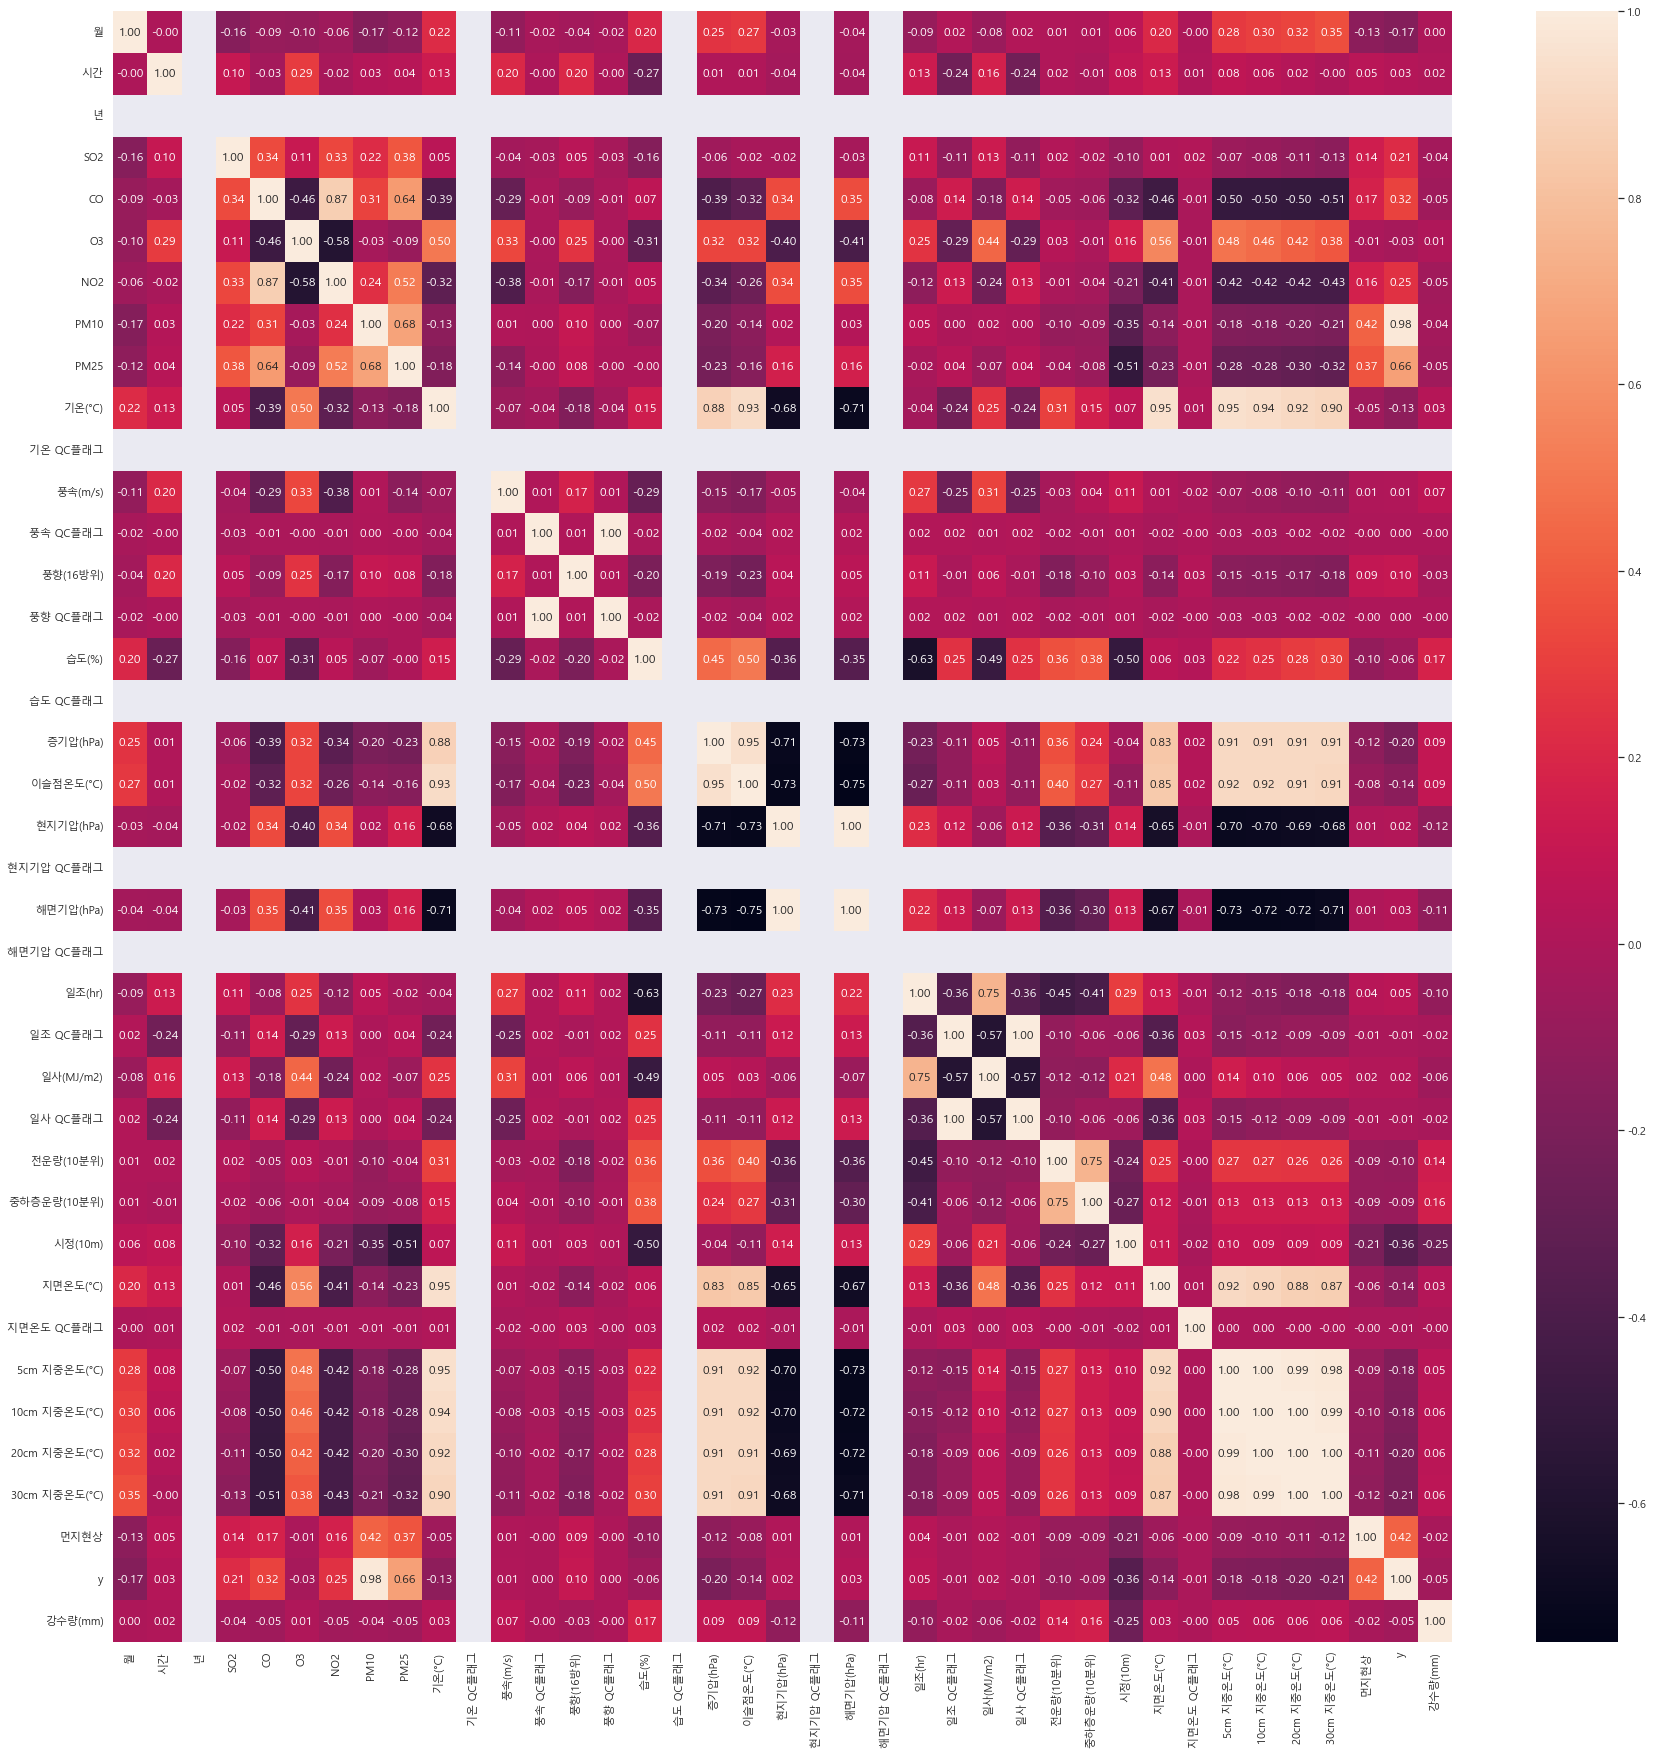

In [298]:
plt.figure(figsize=(30,30))
sns.heatmap(iter_data_21.corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
def target_class(data, target, col):
    print(col)
    plt.figure(figsize=(15,15))
    sns.barplot(data=data, x=col, y=target)
    plt.axhline(data[target].mean(), color='r')
    plt.show()


def target_num(data, target, col):
    print(col)
    plt.figure(figsize=(10,7))
    sns.regplot(data=data, x=col, y=target)
    plt.title(col)
    plt.grid()
    plt.show()
    result = spst.pearsonr(data[target], data[col])
    print(result)

In [ ]:
for c in num_col_drop:
    target_num(iter_data_21, 'y', c)